##### Copyright 2018 The TensorFlow Authors.

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [46]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

## 데이터 탐색

모델을 훈련하기 전에 데이터셋 구조를 살펴보자. 
다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 
각 이미지는 28x28 픽셀로 표현됩니다.

In [47]:
train_images.shape

(60000, 28, 28)

각 레이블은 0과 9사이의 정수입니다.

In [25]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.

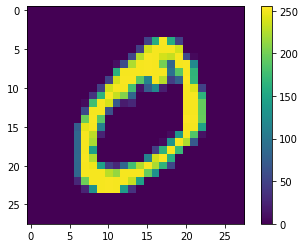

In [48]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [27]:
# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다.

In [29]:
# MLP 정의
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
# 학습 방식에 대한 환경 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 다중 클래스 분류 시 사용
              metrics=['accuracy']) # 평가지표

## 모델 훈련

### 모델 피드

훈련을 시작하려면 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다.

In [31]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9277
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9863


모델이 훈련되면서 손실과 정확도 지표가 출력됩니다.

### 정확도 평가
테스트 데이터로 모델의 정확도 평가

In [32]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0788 - accuracy: 0.9757 - 663ms/epoch - 2ms/step

Test accuracy: 0.9757000207901001


### 예측하기

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 

In [14]:
predictions = model.predict(test_images)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:

In [15]:
predictions[0]

array([7.0261219e-10, 5.9610560e-11, 6.5551053e-09, 4.4178050e-06,
       2.7379804e-12, 1.1431914e-10, 3.2984117e-15, 9.9998641e-01,
       1.8251585e-08, 9.1876818e-06], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 숫자에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 알아봅시다.

In [16]:
np.argmax(predictions[0])

7

모델은 예측한 레이블이 맞는지 확인

In [17]:
test_labels[0]

7

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [50]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

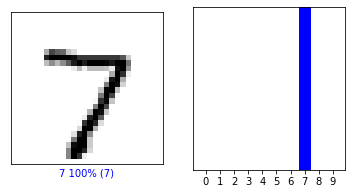

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

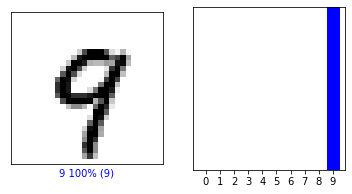

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.